**1. Loading Data**
### Loading the dataset after importing necessary libraries

**2. Data Cleaning**
###These all steps are not required since we are using government data but we will have a look at whether null values are there or not, whether duplicates are present or not and etc

    Deleting duplicates
    Renaming columns
    Removing NaN values  

**3. Data Visualization**
### Few questions before proceeding to visualization
    District wise demand
    District wise descriptions (ie major_desc, minor_desc, sub_minor_desc)
    District wise SOE trend
    District wise netpayment (average)
    District wise SOE description
    District wise treasuries (how many are there in a district)
    How many DDO's are there in a treaury and thus in district
    SOE wise netpayment
    Demand wise netpayment
    Demand descriptions (ie major_desc, minor_desc, sub_minor_desc) wise netpayment
    Top 10 DDO's netpayment wise
    Top 10 treasuries netpayment wise
    Top 10 SOE netpayment wise

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spen1=pd.read_csv("/content/drive/My Drive/district_spending_expenditure_fy_2018_19.csv") # reading the dataset

In [3]:
spen1.head() # displaying first 5 rows of spending data of fiscal year 2018_19

,District,Treasury_Code,Treasury,DDO_Code,DDO_Desc,demand,demand_desc,major,major_desc,sub_major,sub_major_desc,minor,minor_desc,sub_minor,sub_minor_desc,budget,voted_charged,plan_nonplan,SOE,SOE_description,TRANSDATE,Voucher,BILLS,GROSS,AGDED,BTDED,NETPAYMENT
0,BILASPUR,BLP00,BILASPUR,1,CIVIL JUDGE (JR DIVISION) BILASPUR,3,ADMINISTRATION OF JUSTICE,2014,ADMINISTRATION OF JUSTICE,0,NaN,105,CIVIL AND SESSION COURTS,1,CIVIL AND SESSION COURTS ESTABLISHMENTS [S00N],S00N,V,N,1,SALARIES,2018-04-03,[TRVch#1],1,95660,4000,120,91540
1,BILASPUR,BLP00,BILASPUR,1,CIVIL JUDGE (JR DIVISION) BILASPUR,3,ADMINISTRATION OF JUSTICE,2014,ADMINISTRATION OF JUSTICE,0,NaN,105,CIVIL AND SESSION COURTS,1,CIVIL AND SESSION COURTS ESTABLISHMENTS [S00N],S00N,V,N,1,SALARIES,2018-04-03,[TRVch#2],1,267108,43000,12681,211427
2,BILASPUR,BLP00,BILASPUR,1,CIVIL JUDGE (JR DIVISION) BILASPUR,3,ADMINISTRATION OF JUSTICE,2014,ADMINISTRATION OF JUSTICE,0,NaN,108,CRIMINAL COURTS,1,ROAD AND DIET MONEY TO WITNESS [S00N],S00N,V,N,20,OTHER CHARGES,2018-04-17,[TRVch#29],1,10000,0,0,10000
3,BILASPUR,BLP00,BILASPUR,1,CIVIL JUDGE (JR DIVISION) BILASPUR,3,ADMINISTRATION OF JUSTICE,2014,ADMINISTRATION OF JUSTICE,0,NaN,108,CRIMINAL COURTS,1,ROAD AND DIET MONEY TO WITNESS [S00N],S00N,V,N,20,OTHER CHARGES,2018-04-20,[TRVch#32],1,10000,0,0,10000
4,BILASPUR,BLP00,BILASPUR,1,CIVIL JUDGE (JR DIVISION) BILASPUR,3,ADMINISTRATION OF JUSTICE,2014,ADMINISTRATION OF JUSTICE,0,NaN,105,CIVIL AND SESSION COURTS,1,CIVIL AND SESSION COURTS ESTABLISHMENTS [S00N],S00N,V,N,5,OFFICE EXPENSES,2018-04-24,[TRVch#52],1,8064,0,0,8064


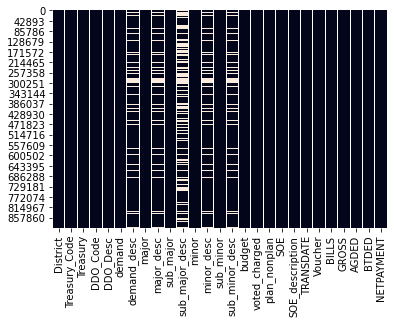

In [4]:
sns.heatmap(spen1.isnull(),cbar=False)
plt.show()
# visualising it here because its more clearly visible here

In [5]:
spen1=spen1.loc[spen1['major'] == 2202]
spen1.head()

,District,Treasury_Code,Treasury,DDO_Code,DDO_Desc,demand,demand_desc,major,major_desc,sub_major,sub_major_desc,minor,minor_desc,sub_minor,sub_minor_desc,budget,voted_charged,plan_nonplan,SOE,SOE_description,TRANSDATE,Voucher,BILLS,GROSS,AGDED,BTDED,NETPAYMENT
4123,BILASPUR,BLP00,BILASPUR,200,PR GOVT COLLEGE BILASPUR,8,EDUCATION,2202,GENERAL EDUCATION,3,UNIVERSITY AND HIGHER EDUCATION,103,GOVERNMENT COLLEGES & INSTITUTES,1,GOVERNMENT COLLEGES [S00N],S00N,V,N,1,SALARIES,2018-04-03,[TRVch#1],1,3640146,666000,176439,2797707
4124,BILASPUR,BLP00,BILASPUR,200,PR GOVT COLLEGE BILASPUR,8,EDUCATION,2202,GENERAL EDUCATION,3,UNIVERSITY AND HIGHER EDUCATION,103,GOVERNMENT COLLEGES & INSTITUTES,1,GOVERNMENT COLLEGES [S00N],S00N,V,N,1,SALARIES,2018-04-03,[TRVch#36],1,709147,142000,26365,540782
4127,BILASPUR,BLP00,BILASPUR,200,PR GOVT COLLEGE BILASPUR,8,EDUCATION,2202,GENERAL EDUCATION,3,UNIVERSITY AND HIGHER EDUCATION,103,GOVERNMENT COLLEGES & INSTITUTES,1,GOVERNMENT COLLEGES [S00N],S00N,V,N,2,WAGES,2018-04-20,[TRVch#619],1,1900,0,0,1900
4130,BILASPUR,BLP00,BILASPUR,200,PR GOVT COLLEGE BILASPUR,8,EDUCATION,2202,GENERAL EDUCATION,3,UNIVERSITY AND HIGHER EDUCATION,103,GOVERNMENT COLLEGES & INSTITUTES,1,GOVERNMENT COLLEGES [S00N],S00N,V,N,1,SALARIES,2018-05-01,[TRVch#287],1,3582909,744000,497938,2340971
4131,BILASPUR,BLP00,BILASPUR,200,PR GOVT COLLEGE BILASPUR,8,EDUCATION,2202,GENERAL EDUCATION,3,UNIVERSITY AND HIGHER EDUCATION,103,GOVERNMENT COLLEGES & INSTITUTES,1,GOVERNMENT COLLEGES [S00N],S00N,V,N,1,SALARIES,2018-05-01,[TRVch#288],1,712763,149000,28365,535398


In [6]:
spen1.shape # shape of education spending dataset

(293289, 27)

In [7]:
spen1.info() # information of dataset
# demand_desc, major_desc, sub_major_desc and minor_desc and sub_minor_desc have lots of null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293289 entries, 4123 to 899995
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   District         293289 non-null  object
 1   Treasury_Code    293289 non-null  object
 2   Treasury         293289 non-null  object
 3   DDO_Code         293289 non-null  int64 
 4   DDO_Desc         293289 non-null  object
 5   demand           293289 non-null  int64 
 6   demand_desc      293213 non-null  object
 7   major            293289 non-null  int64 
 8   major_desc       293289 non-null  object
 9   sub_major        293289 non-null  int64 
 10  sub_major_desc   293280 non-null  object
 11  minor            293289 non-null  int64 
 12  minor_desc       293232 non-null  object
 13  sub_minor        293289 non-null  int64 
 14  sub_minor_desc   293223 non-null  object
 15  budget           293289 non-null  object
 16  voted_charged    293289 non-null  object
 17  plan_no

In [8]:
# dropping unnecessary columns
spen1.drop(["budget", 'voted_charged', "plan_nonplan","BILLS"],axis=1,inplace=True)

**Checking duplicate values**

In [9]:
spen1.duplicated().sum() # no duplicate values present

0

**Null Values**
### Let's have a look at null values and visualize them



In [10]:
spen1.isnull().sum() # checking for null values

District            0
Treasury_Code       0
Treasury            0
DDO_Code            0
DDO_Desc            0
demand              0
demand_desc        76
major               0
major_desc          0
sub_major           0
sub_major_desc      9
minor               0
minor_desc         57
sub_minor           0
sub_minor_desc     66
SOE                 0
SOE_description     0
TRANSDATE           0
Voucher             0
GROSS               0
AGDED               0
BTDED               0
NETPAYMENT          0
dtype: int64

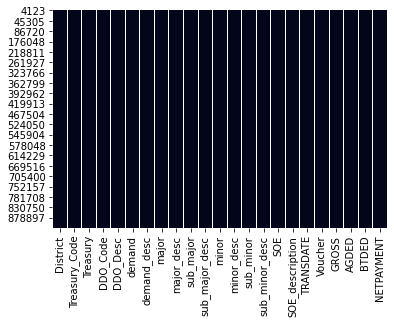

In [11]:
sns.heatmap(spen1.isnull(),cbar=False)
plt.show()
# visualizing null values 
# can not show clearly as there are few null values

**Statistical summary**

In [12]:
spen1.describe() # only numerical columns

,DDO_Code,demand,major,sub_major,minor,sub_minor,SOE,GROSS,AGDED,BTDED,NETPAYMENT
count,293289.000000,293289.000000,293289.0,293289.000000,293289.000000,293289.000000,293289.000000,2.932890e+05,2.932890e+05,2.932890e+05,2.932890e+05
mean,219.305906,10.040111,2202.0,2.070548,204.270187,2.198333,5.879082,1.942668e+05,4.088031e+04,1.173362e+04,1.416528e+05
std,42.641281,6.589902,0.0,6.052787,243.338607,2.330350,14.459345,2.915981e+06,1.937147e+05,4.325798e+04,2.888240e+06
min,1.000000,0.000000,2202.0,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,205.000000,8.000000,2202.0,1.000000,101.000000,1.000000,1.000000,6.300000e+03,0.000000e+00,0.000000e+00,4.562000e+03
50%,212.000000,8.000000,2202.0,2.000000,109.000000,1.000000,1.000000,4.320000e+04,0.000000e+00,1.600000e+02,3.194800e+04
75%,223.000000,8.000000,2202.0,2.000000,109.000000,3.000000,3.000000,1.566640e+05,2.500000e+04,1.012000e+04,1.119890e+05
max,536.000000,32.000000,2202.0,80.000000,800.000000,27.000000,99.000000,8.537000e+08,5.382902e+06,2.965440e+06,8.537000e+08


**Correlation analysis**

Index(['District', 'Treasury_Code', 'Treasury', 'DDO_Code', 'DDO_Desc',
       'demand', 'demand_desc', 'major', 'major_desc', 'sub_major',
       'sub_major_desc', 'minor', 'minor_desc', 'sub_minor', 'sub_minor_desc',
       'SOE', 'SOE_description', 'TRANSDATE', 'Voucher', 'GROSS', 'AGDED',
       'BTDED', 'NETPAYMENT'],
      dtype='object')

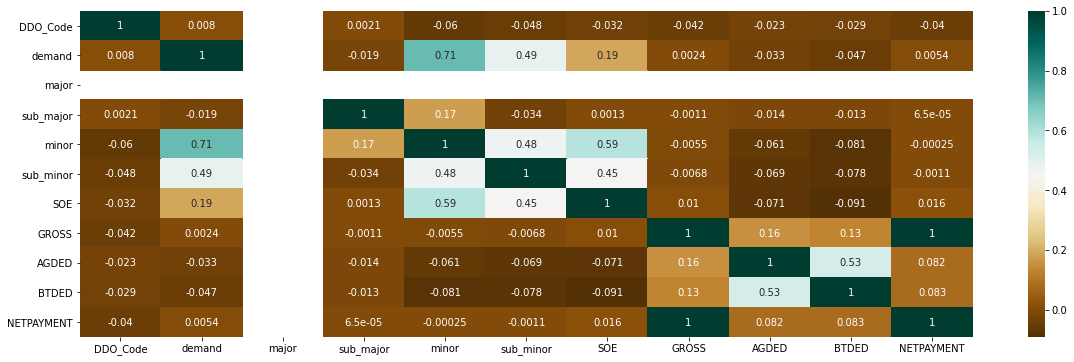

In [13]:
# correlation
corr=spen1.corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr,cmap="BrBG",annot=True)
spen1.columns

In [14]:
# Highest corr is between demand and minor which is 0.71

**Checking distribution**

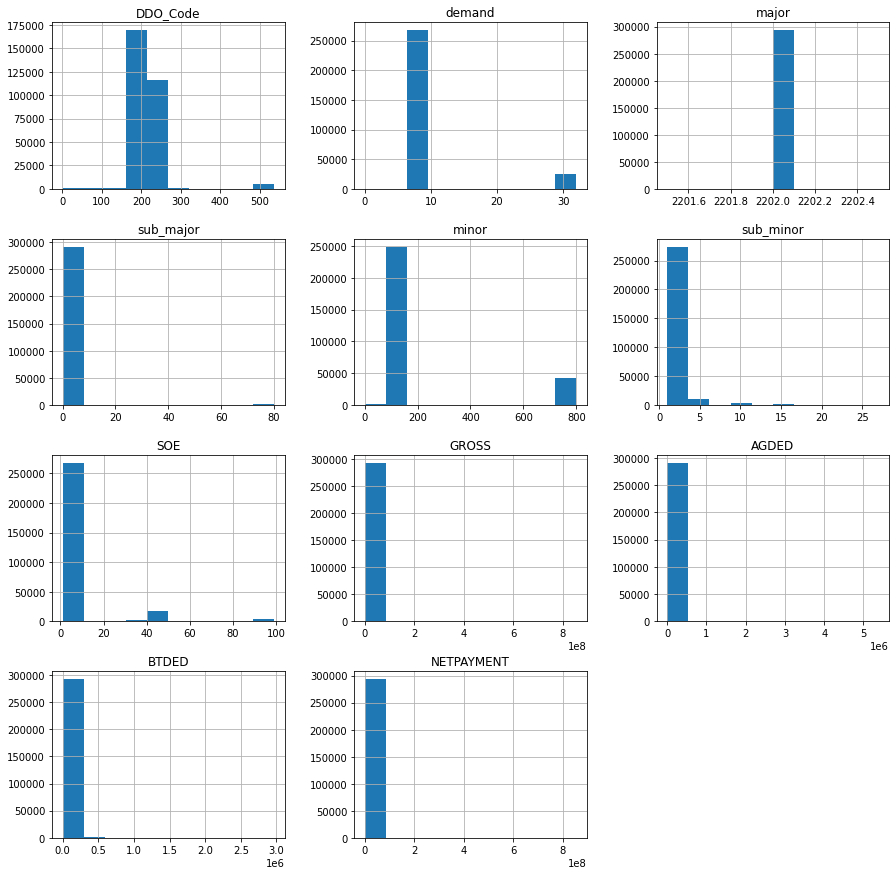

In [15]:
spen1.hist(figsize=(15,15))
plt.show()

    In original data,following things can be observed
    can see that data is skewed 
    "demand" is slightly positive skewed
    "DDO_code" is positively skewed / Right skewed
    "SOE" is also positively skewed
    Thus need to apply transformations to make it normally distributed

    But in education spending data, 
    DDO_code seems to be approximately normal
    

**Checking Outliers**

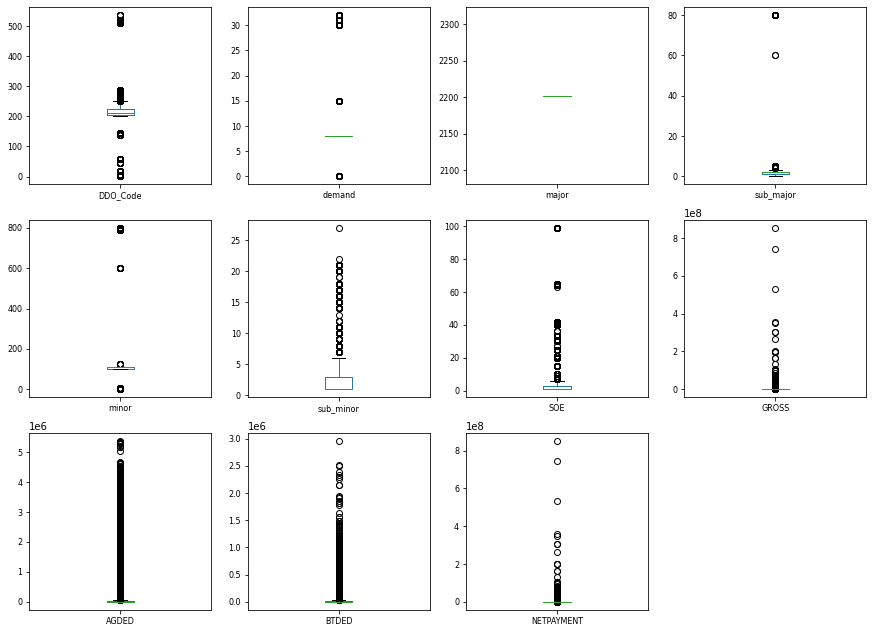

In [16]:
spen1.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8, figsize = (15, 15))
plt.show()

### outliers output
    We can see huge number of outliers in DDO_code, major, sub_major, sub_minor,SOE, gross, agded, btded and netpayment. 
    They are the values which are extreme to the normal values. Many ML models gets affected by outliers so one should move to tree based methods which are not affected by their presence

**Univariate analysis**

In [17]:
spen1["District"].value_counts()

DHARAMSALA                 53606
MANDI                      50060
SHIMLA                     41032
CHAMBA                     23448
SIRMAUR                    22879
SOLAN                      20133
UNA                        19746
HAMIRPUR                   17850
BILASPUR                   16102
KULLU                      15056
KINNAUR                     6239
LAHAUL AND SPITI            4350
SHIMLA CAPITAL TREASURY     2788
Name: District, dtype: int64

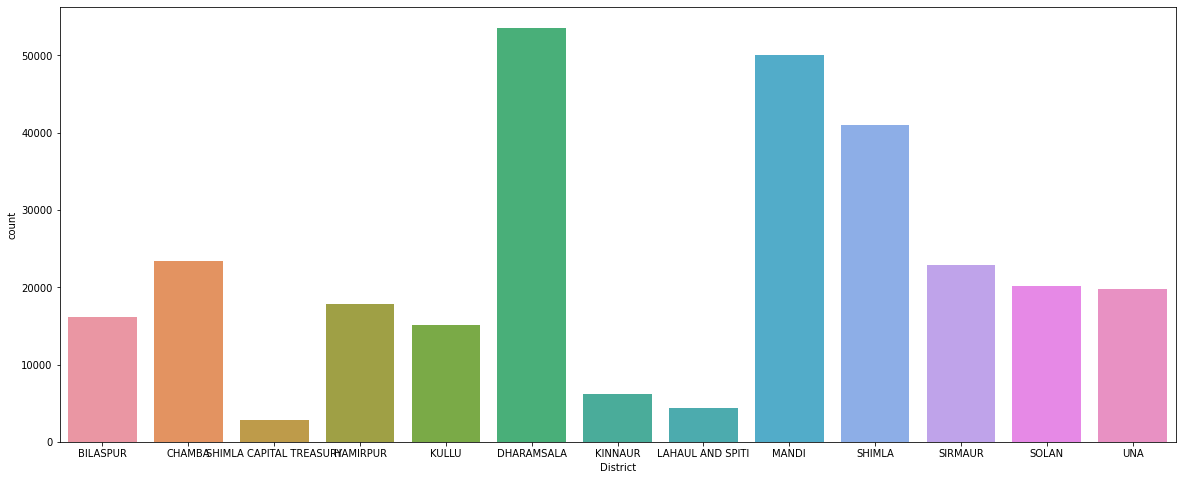

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(x=spen1["District"])
plt.show()

    we see that there are 13 different districts (Actually 12 but Shimla capital treasury is also counted)

    We can clearly see that Dharamshala is the hightest spending district

In [19]:
spen1.columns

Index(['District', 'Treasury_Code', 'Treasury', 'DDO_Code', 'DDO_Desc',
       'demand', 'demand_desc', 'major', 'major_desc', 'sub_major',
       'sub_major_desc', 'minor', 'minor_desc', 'sub_minor', 'sub_minor_desc',
       'SOE', 'SOE_description', 'TRANSDATE', 'Voucher', 'GROSS', 'AGDED',
       'BTDED', 'NETPAYMENT'],
      dtype='object')

In [20]:
spen1["demand_desc"].value_counts()

EDUCATION                              267418
TRIBAL DEVELOPMENT                      15515
SCHEDULED CASTES SUB PLAN                9030
MISCELLANEOUS GENERAL SERVICES           1109
PLANNING AND BACKWARD AREA SUB-PLAN       141
Name: demand_desc, dtype: int64

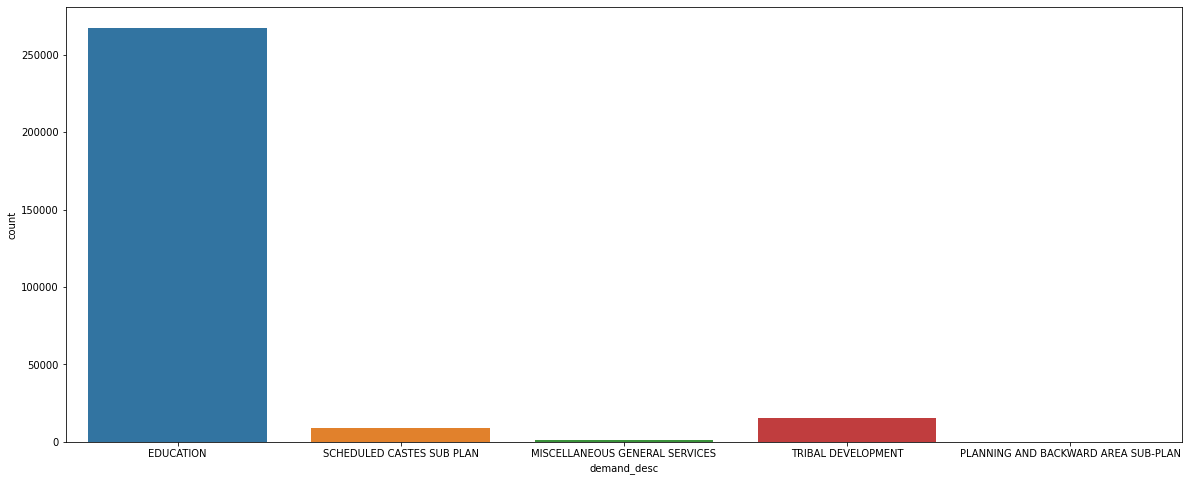

In [21]:
plt.figure(figsize=(20,8))
sns.countplot(x=spen1["demand_desc"])
plt.show()

    This shows that "Education" is having highest demand description

In [22]:
spen1["major_desc"].value_counts()

GENERAL EDUCATION    293289
Name: major_desc, dtype: int64

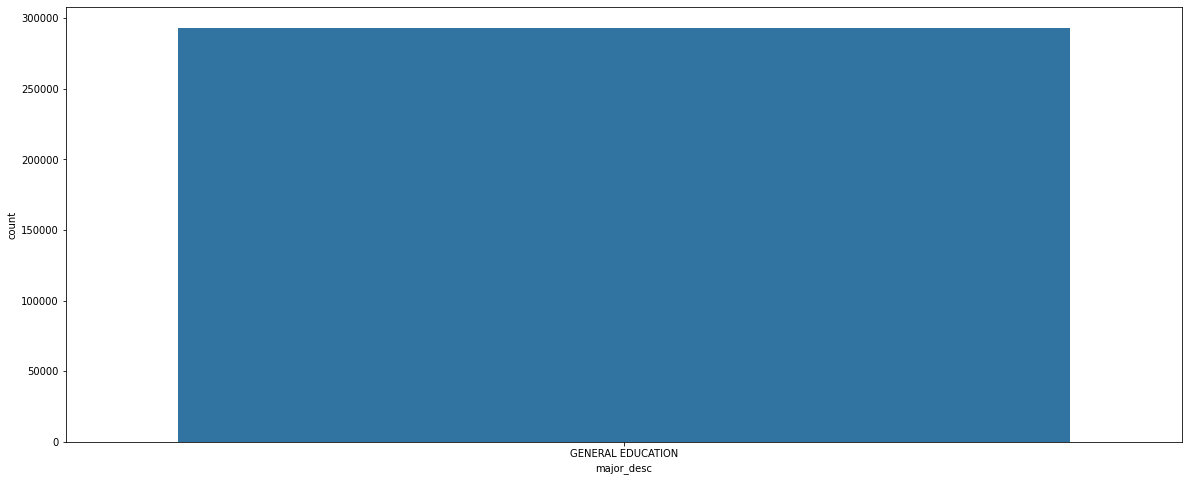

In [23]:
plt.figure(figsize=(20,8))
sns.countplot(x=spen1["major_desc"])
plt.show()

In [24]:
spen1["sub_major_desc"].value_counts()

SECONDARY EDUCATION                145083
ELEMENTARY EDUCATION               132398
UNIVERSITY AND HIGHER EDUCATION     12416
GENERAL                              1739
LANGUAGE DEVELOPMENT                 1641
ADULT EDUCATION                         3
Name: sub_major_desc, dtype: int64

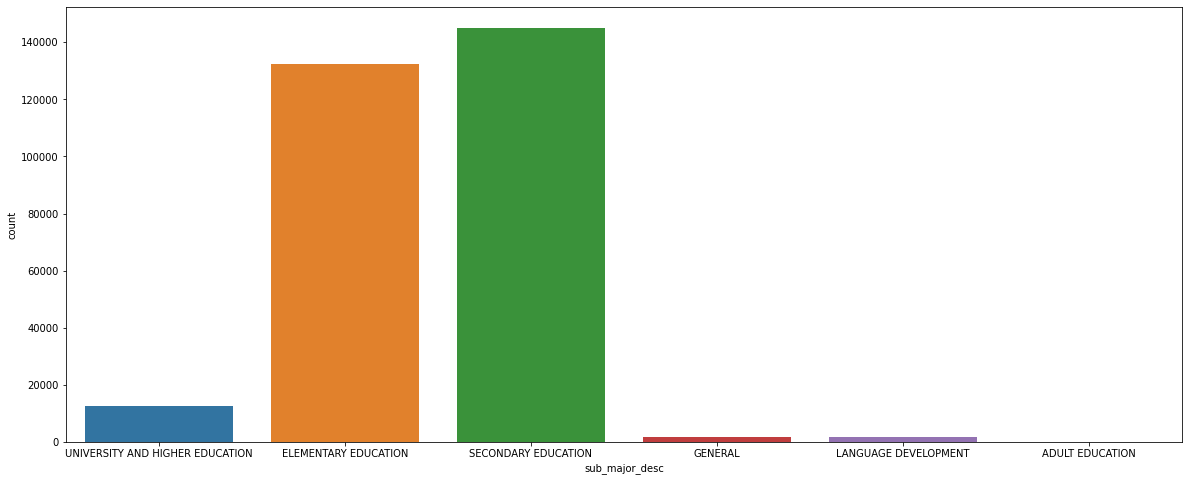

In [25]:
plt.figure(figsize=(20,8))
sns.countplot(x=spen1["sub_major_desc"])
plt.show()

    secondary education spends the most with elementary education on 2nd

In [26]:
spen1["minor_desc"].value_counts()

GOVERNMENT SECONDARY SCHOOLS                           126515
GOVERNMENT PRIMARY SCHOOLS                              99476
OTHER EXPENDITURE                                       17778
TRIBAL AREA SUB PLAN                                    15515
GOVERNMENT COLLEGES & INSTITUTES                        11772
INSPECTION                                               9831
SPECIAL COMPONENT PLAN FOR SCHEDULED CASTES              9030
DIRECTION & ADMINISTRATION                               1596
DIRECTION AND ADMINISTRATION                              572
TEACHERS TRAINING                                         512
SANSKRIT EDUCATION                                        481
PROMOTION OF MODERN INDIAN LANGUAGES & LITERATURE          96
RESEARCH                                                   15
ASSISTANCE TO NON-GOVERNMENT PRIMARY SCHOOLS               12
ASSISTANCE TO UNIVERSITIES                                  9
SCHOLARSHIPS                                                8
ASSISTAN

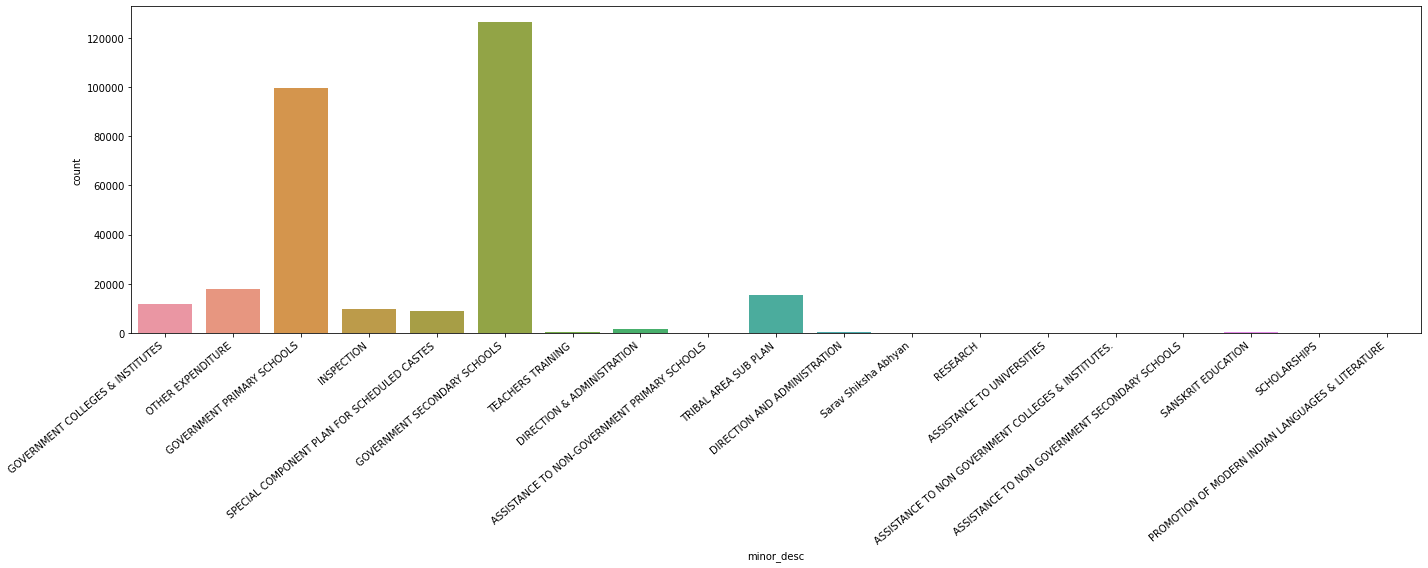

In [27]:
plt.figure(figsize=(20,8))
ax=sns.countplot(x=spen1["minor_desc"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

    Government secondary schools spends the most in "minor_desc"

In [28]:
spen1["SOE_description"].value_counts()

SALARIES                               195251
OFFICE EXPENSES                         21924
MEDICAL REIMBURSEMENT                   18190
GIA GENERAL (Salary)                    17840
TRAVEL EXPENSES                         17694
WAGES                                   14255
HONORARIUM                               3477
MATERIAL AND SUPPLY                      2136
OTHER CHARGES                             678
MOTOR VEHICLES OS POL REPAIR              572
TRANSFER EXPENSES                         369
MACHINERY AND EQUIPMENT                   195
SCHOLARSHIPS STIPENDS AND CONCESS.        183
RENT  RATES AND TAXES                     149
REMUNERATION TO OUTSOURCE EMPLOYEES       107
REFUNDS                                    76
GIA GENERAL (Non-Salary)                   73
TRAINING                                   67
PUBLICATIONS                               18
MAINTENANCE                                15
HOSPITALITY AND ENT.EXPENSES                9
MINOR WORKS                       

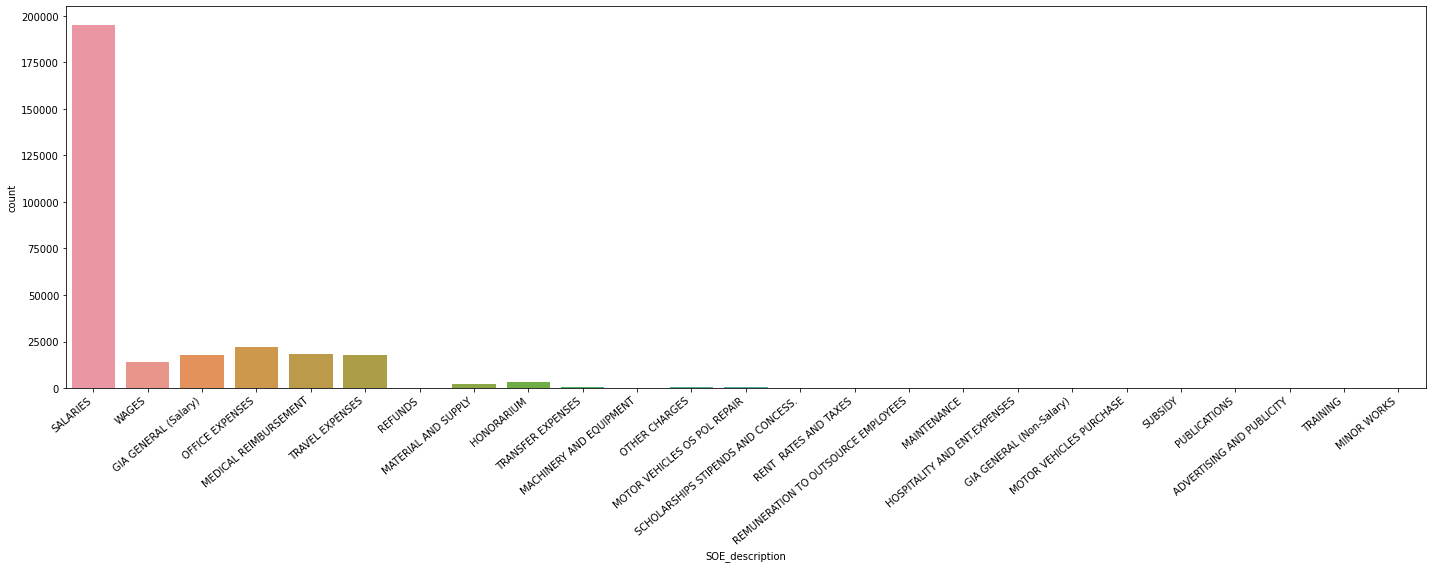

In [29]:
plt.figure(figsize=(20,8))
ax=sns.countplot(x=spen1["SOE_description"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

    It is cleary seen that salaries has highest spendings under SOE_description